In [8]:
import psycopg2
import csv

# Configuração do banco
conn = psycopg2.connect(
    dbname="instadb",
    user="postgres",
    password="1234",
    host="localhost",
    port="5432"
)
cur = conn.cursor()

# Caminho do arquivo CSV
csv_path = "seguidores_20250409_000930.csv"

with open(csv_path, newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for row in reader:
        cur.execute("""
            INSERT INTO seguidores (
                username,
                full_name,
                is_private,
                is_verified,
                profile_pic_url,
                is_business_account,
                is_joined_recently,
                has_channel,
                data_coleta
            ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
        """, (
            row['username'],
            row['full_name'],
            row['is_private'] == 'True',
            row['is_verified'] == 'True',
            row['profile_pic_url'],
            row['is_business_account'] == 'True',
            row['is_joined_recently'] == 'True',
            row['has_channel'] == 'True',
            row['data_coleta']
        ))

conn.commit()
cur.close()
conn.close()

print("✅ Dados injetados com sucesso!")


✅ Dados injetados com sucesso!


In [ ]:
import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv('app\seguidores_20250409_000930.csv')

# Mostrar as primeiras linhas
print(df)

                    username                  full_name  is_private  \
0                   dalino.i                        NaN        True   
1            barreto.kalitha            Kalitha Barreto        True   
2        correiagodinhorocha                Rocha liria        True   
3                 nickallanx                       Nick       False   
4                  edegarsjr              Edegar Junior        True   
..                       ...                        ...         ...   
145             leandrajesus              Leandra Jesus       False   
146  __.vanzinh._s.fari211__             Vanessa Soares        True   
147                 xnena_yz                 Maria Nena       False   
148            gabymalcovisk  Milena Gabriela Malcovisk       False   
149            wewe_barbosaa           Weverton Willian        True   

     is_verified          data_coleta  
0          False  2025-04-08 23:46:45  
1          False  2025-04-08 23:46:45  
2          False  2025-04-0

In [10]:
# Informações gerais sobre o DataFrame
print("\nInformações do DataFrame:")
print(df.info())

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe(include='all'))


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   username     150 non-null    object
 1   full_name    146 non-null    object
 2   is_private   150 non-null    bool  
 3   is_verified  150 non-null    bool  
 4   data_coleta  150 non-null    object
dtypes: bool(2), object(3)
memory usage: 3.9+ KB
None

Estatísticas descritivas:
        username      full_name is_private is_verified          data_coleta
count        150            146        150         150                  150
unique       150            145          2           2                    4
top     dalino.i  Maria Eduarda      False       False  2025-04-08 23:46:45
freq           1              2         98         149                   50


In [11]:
# Contar quantos perfis são verificados
verificados = df['is_verified'].sum()
print(f"\nPerfis verificados: {verificados}")

# Verificar se a coluna 'followed_by_viewer' existe antes de acessá-la
if 'followed_by_viewer' in df.columns:
	# Contar quantos você segue de volta (followed_by_viewer)
	seguindo_de_volta = df['followed_by_viewer'].sum()
	print(f"Você segue de volta: {seguindo_de_volta} perfis")

	# Porcentagem de perfis que você segue de volta
	porcentagem = (seguindo_de_volta / len(df)) * 100
	print(f"Isso representa {porcentagem:.2f}% do total")
else:
	print("A coluna 'followed_by_viewer' não existe no DataFrame.")


Perfis verificados: 1
A coluna 'followed_by_viewer' não existe no DataFrame.


In [12]:
# Perfis com nome vazio
sem_nome = df[df['full_name'] == '']
print(f"\nPerfis sem nome completo: {len(sem_nome)}")

# Nomes mais comuns (se houver padrões)
# Primeiro, vamos limpar os nomes e verificar palavras frequentes
nomes = df['full_name'].dropna().str.lower().str.split(expand=True).stack()
contagem_nomes = nomes.value_counts()
print("\nPalavras mais comuns em nomes:")
print(contagem_nomes.head(10))


Perfis sem nome completo: 0

Palavras mais comuns em nomes:
|            8
de           8
da           5
e            4
a            4
eduarda      4
lana         4
santos       3
silva        3
cristiane    3
Name: count, dtype: int64


In [13]:
# Verificar se a coluna 'profile_pic_url' existe antes de acessá-la
if 'profile_pic_url' in df.columns:
	# Extrair domínios das URLs de perfil (pode revelar padrões)
	df['profile_domain'] = df['profile_pic_url'].str.extract(r'//([^/]+)')
	dominios = df['profile_domain'].value_counts()
	print("\nDomínios mais comuns para fotos de perfil:")
	print(dominios)
else:
	print("A coluna 'profile_pic_url' não existe no DataFrame.")

A coluna 'profile_pic_url' não existe no DataFrame.


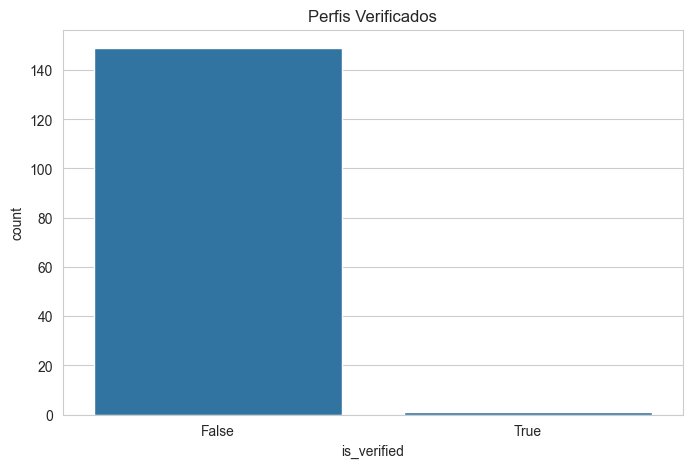

ValueError: Could not interpret value `followed_by_viewer` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo
sns.set_style("whitegrid")

# Gráfico de barras para perfis verificados
plt.figure(figsize=(8, 5))
sns.countplot(x='is_verified', data=df)
plt.title('Perfis Verificados')
plt.show()

# Gráfico de barras para followed_by_viewer
plt.figure(figsize=(8, 5))
sns.countplot(x='followed_by_viewer', data=df)
plt.title('Seguidos por Você')
plt.show()

In [ ]:
# Adicionar uma coluna com o comprimento do nome de usuário
df['username_length'] = df['username'].apply(len)

# Salvar DataFrame com novas colunas
df.to_csv('seguidores_analisado.csv', index=False)